## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import folium
import json
import plotly.graph_objects as go
from shapely.geometry import shape, Point


## Data loading

In [2]:
# define the path and assign data frame to the "df" variable

path = r'C:\Users\Jakov\Achievement 6'

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_data_cleaned.csv'), index_col = 0)

In [154]:
# load geographic data

geo_data = open(r'C:\Users\Jakov\Achievement 6\02 Data\Original Data/custom.geo.json',"r", encoding="latin-1")

In [156]:
json_data = json.load(geo_data)

In [157]:
json_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'featurecla': 'Admin-0 country',
    'scalerank': 1,
    'labelrank': 2,
    'sovereignt': 'France',
    'sov_a3': 'FR1',
    'adm0_dif': 1,
    'level': 2,
    'type': 'Country',
    'tlc': '1',
    'admin': 'France',
    'adm0_a3': 'FRA',
    'geou_dif': 0,
    'geounit': 'France',
    'gu_a3': 'FRA',
    'su_dif': 0,
    'subunit': 'France',
    'su_a3': 'FRA',
    'brk_diff': 0,
    'name': 'France',
    'name_long': 'France',
    'brk_a3': 'FRA',
    'brk_name': 'France',
    'brk_group': None,
    'abbrev': 'Fr.',
    'postal': 'F',
    'formal_en': 'French Republic',
    'formal_fr': None,
    'name_ciawf': 'France',
    'note_adm0': None,
    'note_brk': None,
    'name_sort': 'France',
    'name_alt': None,
    'mapcolor7': 7,
    'mapcolor8': 5,
    'mapcolor9': 9,
    'mapcolor13': 11,
    'pop_est': 67059887,
    'pop_rank': 16,
    'pop_year': 2019,
    'gdp_md': 2715518,
    'gdp_year': 2019

## Data preparation

In [5]:
df['year_built'].unique()

array([2017, 2020,    0, 2019, 1999, 2018, 1987, 2004, 1997, 1985, 1981,
       2011, 1979, 1998, 1994, 1996, 1972, 1980, 1974, 1983, 1991, 1992,
       1961, 2015, 2000, 1993, 1968, 2007, 1990, 2010, 1975, 1986, 1941,
       1971, 2005, 1995, 1976, 2001, 2006, 2016, 1984, 1964, 1978, 1940,
       1988, 2003, 1977, 1973, 1970, 1913, 1965, 1950, 2014, 2002, 1963,
       2008, 1948, 1960, 1930, 2009, 1989, 1969, 1982, 1937, 2013, 2012,
       1954, 1959, 1909, 1926, 1910, 1962, 1938, 1936, 1967, 1903, 1933,
       1906, 1908, 2021, 1927, 1929, 1956, 1958, 1922, 1952, 1957, 1928,
       1905, 1951, 1911, 1966, 1915, 1934, 1939, 1953, 1924, 1931, 1920,
       1898, 1955, 1907, 1885, 1895, 1914, 1901, 1942, 1919, 1925, 1889,
       1946, 1904, 1923, 1917, 1935, 1949, 1947, 1912, 1945, 1897, 1902,
       1900], dtype=int64)

In [59]:
df.head()

boat_type          manufacturer                 type  year_built  \
0          Motor Yacht  Rigiflex power boats  new boat from stock        2017   
1  Center console boat     Terhi power boats  new boat from stock        2020   
2           Sport Boat    Marine power boats  new boat from stock           0   
3           Sport Boat    Pioner power boats  new boat from stock        2020   
4         Fishing Boat    Linder power boats  new boat from stock        2019   

   length  width       material                                    location  \
0    4.00   1.90            NaN      Switzerland Â» Lake Geneva Â» VÃ©senaz   
1    4.00   1.50  Thermoplastic                    Germany Â» BÃ¶nningstedt   
2    3.69   1.42      Aluminium  Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH   
3    3.00   1.00            NaN                        Denmark Â» Svendborg   
4    3.55   1.46      Aluminium               Germany Â» Bayern Â» MÃ¼nchen   

   views_last_7_days old_currency  price_euro      country  
0                226          CHF     3493.24  Switzerland  
1                 75          EUR     3490.00      Germany  
2                124          CHF     3946.51  Switzerland  
3                 64          DKK     3475.67      Denmark  
4                 58          EUR     3399.00      Germany

In [60]:
df['country'].value_counts(dropna=False)

Germany               1944
Italy                 1803
France                1231
Switzerland           1137
Netherlands           1059
Croatia                817
Spain                  706
United Kingdom         242
Denmark                174
Portugal               135
Austria                 90
Greece                  83
Malta                   72
Belgium                 65
Turkey                  64
Poland                  42
Slovenia                40
Finland                 35
NaN                     33
Montenegro              22
Sweden                  13
Monaco                  10
Slovak Republic          9
Russian Federation       7
Estonia                  6
Lithuania                5
Czech Republic           5
Cyprus                   5
Hungary                  4
Latvia                   3
Bulgaria                 3
Thailand                 3
Ukraine                  2
Martinique               2
Australia                2
Norway                   2
Isle of Man              1
L

In [65]:
# filter out countries which have less than 20 boats to get the result which is statistically significant

# Get the boat counts of each country in the 'Country' column
country_counts = df['country'].value_counts(dropna=False)

# Create a mask to filter countries that appear more than 20 times
countries_to_keep = country_counts[country_counts > 20].index

# Filter the DataFrame to keep rows with countries appearing more than 20 times
subset = df[df['country'].isin(countries_to_keep)]

In [66]:
# filter out rows where "country" is missing

subset2 = subset[subset['country'].notnull()]

In [68]:
subset2['country'].value_counts(dropna=False)

Germany           1944
Italy             1803
France            1231
Switzerland       1137
Netherlands       1059
Croatia            817
Spain              706
United Kingdom     242
Denmark            174
Portugal           135
Austria             90
Greece              83
Malta               72
Belgium             65
Turkey              64
Poland              42
Slovenia            40
Finland             35
Montenegro          22
Name: country, dtype: int64

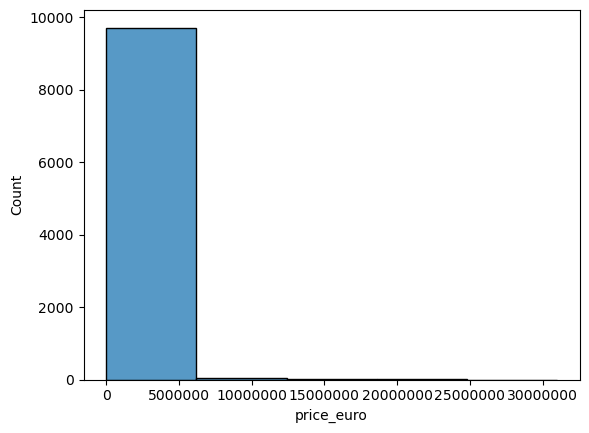

In [69]:
sns.histplot(subset2['price_euro'], bins=5)  # shows extreme values for 'price_euro'

# Access the current axes
ax = plt.gca()

# Change the tick format of the x-axis to normal notation
ax.get_xaxis().get_major_formatter().set_scientific(False)

In [106]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(subset2['price_euro'], 25)
Q3 = np.percentile(subset2['price_euro'], 75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the upper fence
upper_fence = Q3 + 1.5 * IQR

In [107]:
upper_fence

537234.8

### All boats with the price above 537234.8 are considered outliers.

In [108]:
# filter out outliers

subset3 = subset2[subset2['price_euro'] <= upper_fence]

In [109]:
subset3['price_euro'].max()

536649.44

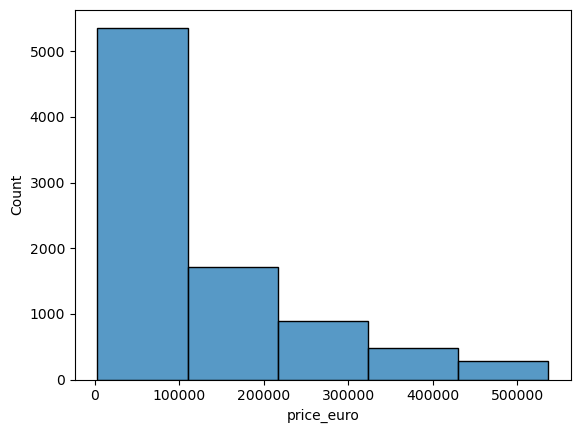

In [110]:
sns.histplot(subset3['price_euro'], bins=5)  # check distribution after filtering outliers out

# Access the current axes
ax2 = plt.gca()

# Change the tick format of the x-axis to normal notation
ax2.get_xaxis().get_major_formatter().set_scientific(False)

In [111]:
subset3['country'].value_counts()

Germany           1864
Italy             1600
Switzerland       1118
France            1104
Netherlands        952
Croatia            675
Spain              545
United Kingdom     179
Denmark            166
Portugal           122
Austria             84
Belgium             63
Malta               53
Greece              46
Poland              41
Slovenia            35
Turkey              34
Finland             31
Montenegro           8
Name: country, dtype: int64

In [112]:
# remove country "Montenegro" as it has less than 20 boats after filtering outliers out

# Get the boat counts of each country in the 'Country' column
country_counts = subset3['country'].value_counts(dropna=False)

# Create a mask to filter countries that appear more than 20 times
countries_to_keep = country_counts[country_counts > 20].index

# Filter the DataFrame to keep rows with countries appearing more than 20 times
subset4 = subset3[subset3['country'].isin(countries_to_keep)]


In [114]:
subset4['country'].value_counts(dropna=False)

Germany           1864
Italy             1600
Switzerland       1118
France            1104
Netherlands        952
Croatia            675
Spain              545
United Kingdom     179
Denmark            166
Portugal           122
Austria             84
Belgium             63
Malta               53
Greece              46
Poland              41
Slovenia            35
Turkey              34
Finland             31
Name: country, dtype: int64

In [228]:
# aggregate data for a visualization

for_viz = subset4.groupby('country').agg(Number_of_Boats=('country', 'size'),
                                         Average_Price=('price_euro', lambda x: round(x.mean(), 2)),
                                         Average_Year_Built=('year_built', lambda x: round(x.mean()))).reset_index()


In [229]:
for_viz

country  Number_of_Boats  Average_Price  Average_Year_Built
0          Austria               84       98388.45                1858
1          Belgium               63      119890.97                1862
2          Croatia              675      185165.31                2004
3          Denmark              166      118585.22                1998
4          Finland               31      185066.94                1940
5           France             1104      120777.38                1988
6          Germany             1864       91194.15                1677
7           Greece               46      287604.35                2004
8            Italy             1600      132961.41                1995
9            Malta               53      183433.02                1970
10     Netherlands              952      128382.34                1912
11          Poland               41      160409.00                2016
12        Portugal              122      129730.64                1988
13        Slovenia               35      117215.14                2006
14           Spain              545      170988.06                1991
15     Switzerland             1118       84927.18                1783
16          Turkey               34      212332.26                2003
17  United Kingdom              179      154444.58                1916

In [226]:
subset4.head(5)

boat_type          manufacturer                 type  year_built  \
0          Motor Yacht  Rigiflex power boats  new boat from stock        2017   
1  Center console boat     Terhi power boats  new boat from stock        2020   
2           Sport Boat    Marine power boats  new boat from stock           0   
3           Sport Boat    Pioner power boats  new boat from stock        2020   
4         Fishing Boat    Linder power boats  new boat from stock        2019   

   length  width       material                                    location  \
0    4.00   1.90            NaN      Switzerland Â» Lake Geneva Â» VÃ©senaz   
1    4.00   1.50  Thermoplastic                    Germany Â» BÃ¶nningstedt   
2    3.69   1.42      Aluminium  Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH   
3    3.00   1.00            NaN                        Denmark Â» Svendborg   
4    3.55   1.46      Aluminium               Germany Â» Bayern Â» MÃ¼nchen   

   views_last_7_days old_currency  price_euro      country  
0                226          CHF     3493.24  Switzerland  
1                 75          EUR     3490.00      Germany  
2                124          CHF     3946.51  Switzerland  
3                 64          DKK     3475.67      Denmark  
4                 58          EUR     3399.00      Germany

## Plotting a Choropleth

In [236]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [54.5260, 15.2551], zoom_start = 3.2)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = json_data, 
    data = for_viz,
    columns = ['country', 'Average_Price'],
    key_on = 'feature.properties.name',
    fill_color = "YlOrRd", fill_opacity=0.8, line_opacity=0.1,
    legend_name = "Average Price of Boats").add_to(map)
folium.LayerControl().add_to(map)

map

In [212]:
# Setup a folium map at a high-level zoom
map2 = folium.Map(location = [54.5260, 15.2551], zoom_start = 3.2)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = json_data, 
    data = for_viz,
    columns = ['country', 'Number_of_Boats'],
    key_on = 'feature.properties.name',
    fill_color = "YlOrRd", fill_opacity=0.8, line_opacity=0.1,
    legend_name = "Number of Boats by Country").add_to(map2)
folium.LayerControl().add_to(map2)



map2

In [235]:
# Setup a folium map at a high-level zoom
map3 = folium.Map(location = [54.5260, 15.2551], zoom_start = 3.2)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = json_data, 
    data = for_viz,
    columns = ['country', 'Average_Year_Built'],
    key_on = 'feature.properties.name',
    fill_color = "YlOrRd", fill_opacity=0.8, line_opacity=0.1,
    legend_name = "Average Year Built by Country").add_to(map3)
folium.LayerControl().add_to(map3)

map3

## Discuss the results and what they mean in a markdown section.


### Does the analysis answer any of your existing research questions?


### Initally, I did not have any questions regarding location or countries. But after seeing these few visualizations, some questions are being raised.

### Does the analysis lead you to any new research questions?

### Yes, the first question is: "Why 'Average_Year_Built' for Germany and Switzerland is so below other countries?".
### Other questions are: "Why Germany and Italy have the highest amount of boats? Is this online marketplace most popular in Germany and Italy?".

In [237]:
map.save('Average Price of Boats.html')
map2.save('Number of Boats by Country.html')
map3.save('Average Year Built by Country.html')